In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
iris= sns.load_dataset('iris')

In [16]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [24]:
iris.shape

(150, 5)

In [32]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

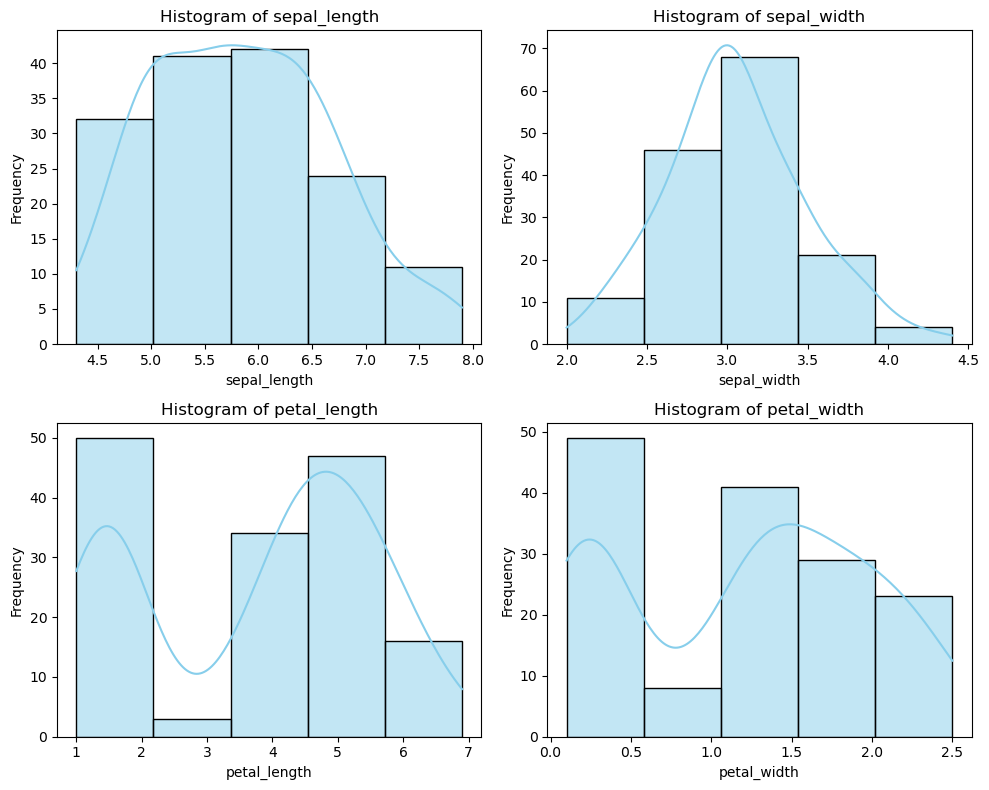

In [38]:
plt.figure(figsize=(10, 8))
for i, feature in enumerate(iris_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(iris[feature], kde=True, bins=5, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\undre\AppData\Local\Temp\ipykernel_18548\481412820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x='species', y=feature, palette='pastel')


ValueError: num must be an integer with 1 <= num <= 1, not 2

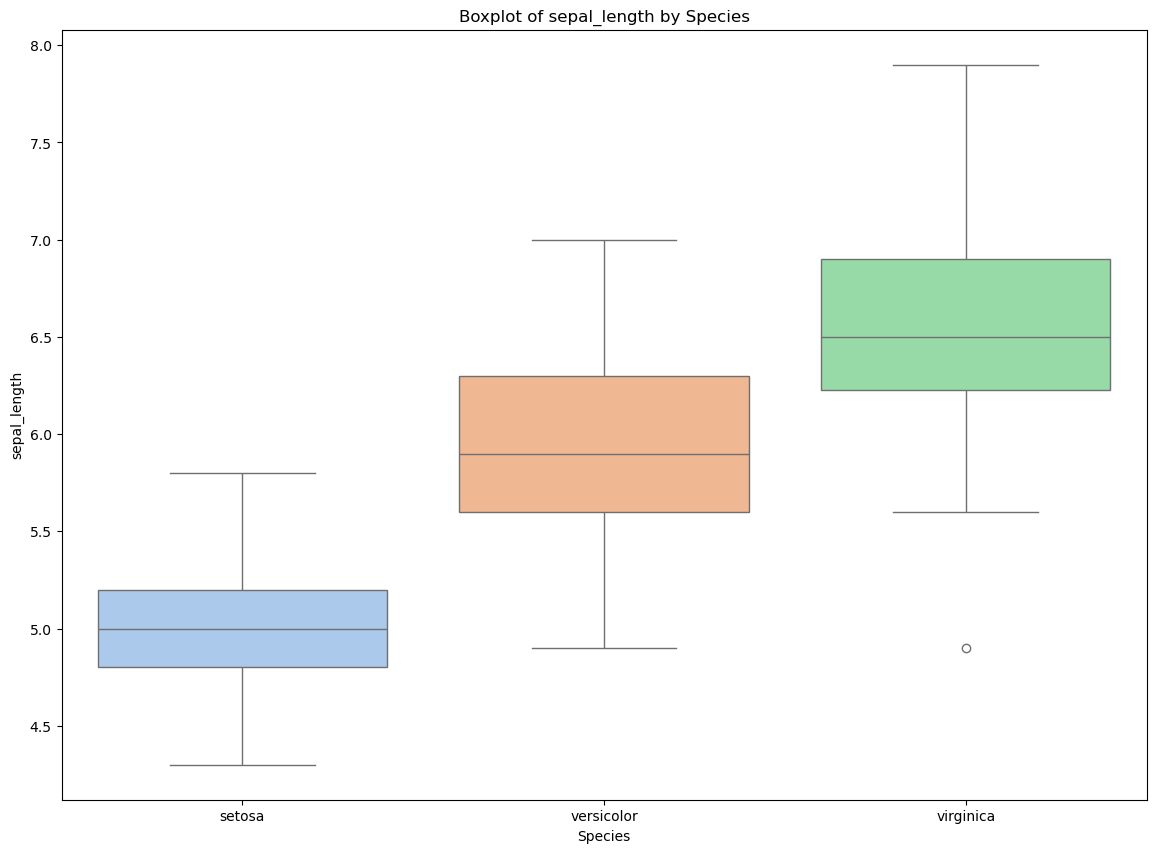

In [74]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(iris_features):
    plt.subplot(1, 1, i + 1)
    sns.boxplot(data=iris, x='species', y=feature, palette='pastel')
    plt.title(f'Boxplot of {feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [62]:


# Function to find outliers using IQR
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in all numeric columns
numeric_columns = iris.select_dtypes(include='number').columns

# Store outliers
all_outliers = pd.DataFrame()
for col in numeric_columns:
    outliers = find_outliers(iris, col)
    print(f"\n🔍 Outliers in '{col}' ({len(outliers)} rows):")
    print(outliers)
    all_outliers = pd.concat([all_outliers, outliers])

# Drop duplicates in case the same row is an outlier in multiple features
all_outliers_unique = all_outliers.drop_duplicates()

print(f"\n🧨 Total Unique Outlier Rows in Dataset: {len(all_outliers_unique)}")
print(all_outliers_unique)



🔍 Outliers in 'sepal_length' (0 rows):
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []

🔍 Outliers in 'sepal_width' (4 rows):
    sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor

🔍 Outliers in 'petal_length' (0 rows):
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []

🔍 Outliers in 'petal_width' (0 rows):
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []

🧨 Total Unique Outlier Rows in Dataset: 4
    sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2   

In [64]:
def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

# Count outliers for each numeric column
numeric_columns = iris.select_dtypes(include='number').columns

print("📊 Outlier Counts per Feature:")
for col in numeric_columns:
    count = count_outliers(iris, col)
    print(f"- {col}: {count} outliers")

📊 Outlier Counts per Feature:
- sepal_length: 0 outliers
- sepal_width: 4 outliers
- petal_length: 0 outliers
- petal_width: 0 outliers
